#Accessing the dataset and Basic workflow


In [71]:
pip install goatools

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.8/15.8 MB 98.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 169.4/169.4 kB 16.8 MB/s eta 0:00:00
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13706 sha256=ef801ec35ff637c3e29e5337fd238ac88d4fe68ab84358f2736a93f132226fdd
  Stored in directory: /root/.cache/pip/wheels/1a/b0/8c/4b75c4116c31f83c8f9f047231251e13cc74481cca4a78a9ce
Successfully built docopt


In [107]:
# import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

# import libraries necessary for functional annotation
from goatools.base import download_go_basic_obo
from goatools.obo_parser import GODag
from goatools import obo_parser

In [2]:
# access the dataset from google drive

from google.colab import drive
drive.mount('/content/drive')
path = "/content/drive/MyDrive/Colab Notebooks/pseudomonas_aeruginosa.csv"

Mounted at /content/drive


In [3]:
# Read the dataset

df = pd.read_csv(path)

In [4]:
# preview the dataset

df.head()

,ID,Name,Sequence,Molecular_Weight,Isoelectric_Point,Protein_Length,Amino_Acid_Composition,Hydrophobicity
0,WP_369686368.1,ATP-binding cassette domain-containing protein...,MLELNFTQTLGSHTLTLNETLPASGITAIFGVSGAGKTSLINAISG...,5756.5430,8.517644,56,"{'M': 1, 'L': 8, 'E': 2, 'N': 3, 'F': 2, 'T': ...",0.339286
1,WP_369686367.1,"aldehyde dehydrogenase family protein, partial...",MQSRDNGKPLAEARGLVMSAAGTARYFAAACELLDGELPTPRQPDR...,6617.5065,6.106918,62,"{'M': 2, 'Q': 2, 'S': 3, 'R': 6, 'D': 3, 'N': ...",-0.146774
2,WP_369686366.1,"hypothetical protein, partial [Pseudomonas aer...",GGEYLEIIEAARDIRVELDAHNYISNILTKLGIDRPSGLTRVMDLA...,9303.2892,4.533444,81,"{'G': 4, 'E': 8, 'Y': 3, 'L': 9, 'I': 6, 'A': ...",-0.406173
3,WP_369686365.1,"hypothetical protein, partial [Pseudomonas aer...",NAVVNQKRVPLAPNGDMLAPGQEKTLSFSGDITRIADIAYTTINDF...,6304.0708,9.989715,58,"{'N': 5, 'A': 5, 'V': 4, 'Q': 3, 'K': 5, 'R': ...",-0.591379
4,WP_369686364.1,homocysteine S-methyltransferase family protei...,MAGYLPQWLDAGAKLIGGCCRTTPQDIAALTVQR,3619.1997,7.810425,34,"{'M': 1, 'A': 5, 'G': 4, 'Y': 1, 'L': 4, 'P': ...",0.141176


In [5]:
# view dimensions of dataset

df.shape

(1000, 8)

In [6]:
# View summary of dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      1000 non-null   object 
 1   Name                    1000 non-null   object 
 2   Sequence                1000 non-null   object 
 3   Molecular_Weight        1000 non-null   float64
 4   Isoelectric_Point       1000 non-null   float64
 5   Protein_Length          1000 non-null   int64  
 6   Amino_Acid_Composition  1000 non-null   object 
 7   Hydrophobicity          1000 non-null   float64
dtypes: float64(3), int64(1), object(4)
memory usage: 62.6+ KB


In [7]:
# View the frequency of each unique elements in 'Name' column

df['Name'].value_counts()

,count
Name,
"conjugal transfer nickase/helicase domain-containing protein, partial [Pseudomonas aeruginosa]",234
"terminase large subunit domain-containing protein, partial [Pseudomonas aeruginosa]",178
terminase large subunit domain-containing protein [Pseudomonas aeruginosa],178
GH36-type glycosyl hydrolase domain-containing protein [Pseudomonas aeruginosa],60
diguanylate cyclase domain-containing protein [Pseudomonas aeruginosa],35
...,...
MULTISPECIES: terminase large subunit domain-containing protein [Pseudomonas aeruginosa group],1
"transcriptional regulator domain-containing protein, partial [Pseudomonas aeruginosa]",1
"STAS-like domain-containing protein, partial [Pseudomonas aeruginosa]",1


##Data Cleaning

In [8]:
# Dropping Columns 'Sequence', 'Amino_Acid_Composition' and 'ID'

df_drop = df.drop(['Sequence', 'Amino_Acid_Composition' , 'ID'], axis=1).copy(deep=True)

In [10]:
# Removing those Values of the Name column whose occurences in the column are lesser than 25

df_clean = df_drop.loc[df_drop.groupby("Name")["Name"].transform("size") > 25]

In [11]:
# Viewing our cleaned Name column

df_clean['Name'].value_counts()

,count
Name,
"conjugal transfer nickase/helicase domain-containing protein, partial [Pseudomonas aeruginosa]",234
"terminase large subunit domain-containing protein, partial [Pseudomonas aeruginosa]",178
terminase large subunit domain-containing protein [Pseudomonas aeruginosa],178
GH36-type glycosyl hydrolase domain-containing protein [Pseudomonas aeruginosa],60
JmjC domain-containing protein [Pseudomonas aeruginosa],35
diguanylate cyclase domain-containing protein [Pseudomonas aeruginosa],35


##EDA and Data Visualization

Text(0.5, 1.0, 'Distribution of Enzyme Classes')

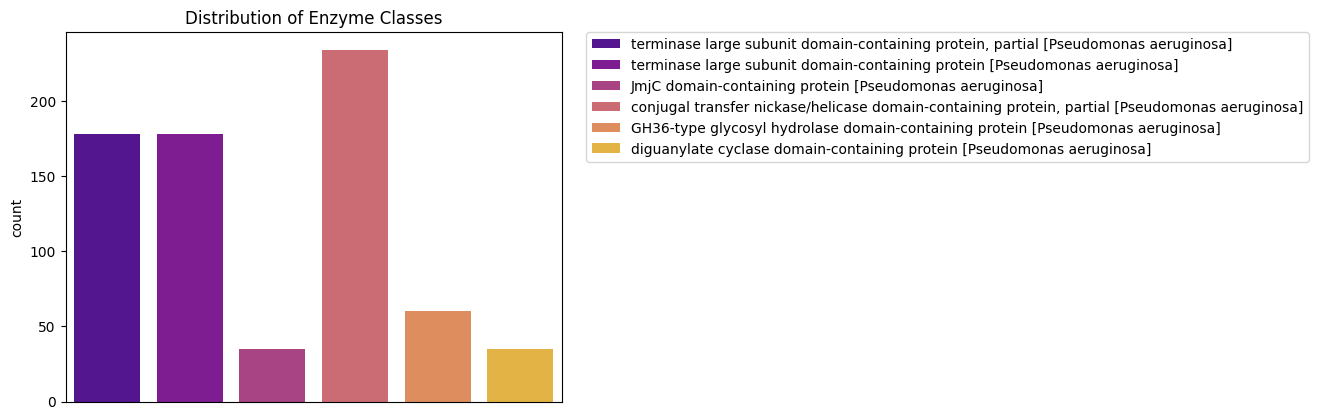

In [12]:
# Creating a seaborn countplot showing the distribuion Of Protein Classes

sns.countplot(data=df_clean, x='Name' ,  hue='Name', legend=True ,   palette='plasma')
plt.xlabel(None)
plt.xticks([])
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.title("Distribution of Enzyme Classes")

<Axes: xlabel='Isoelectric_Point', ylabel='Count'>

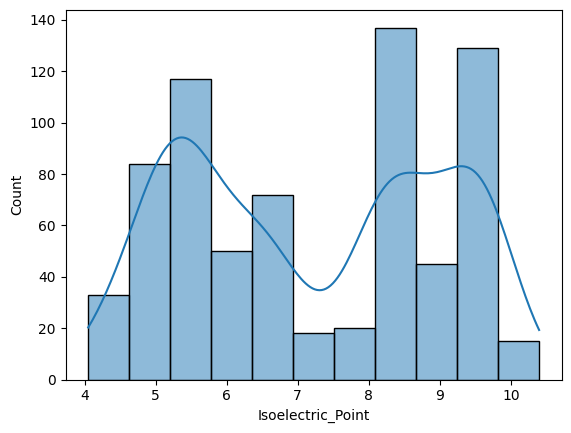

In [13]:
# Creating a histogram plot of 'Isoelectric Point'

sns.histplot(df_clean['Isoelectric_Point'], kde=True)

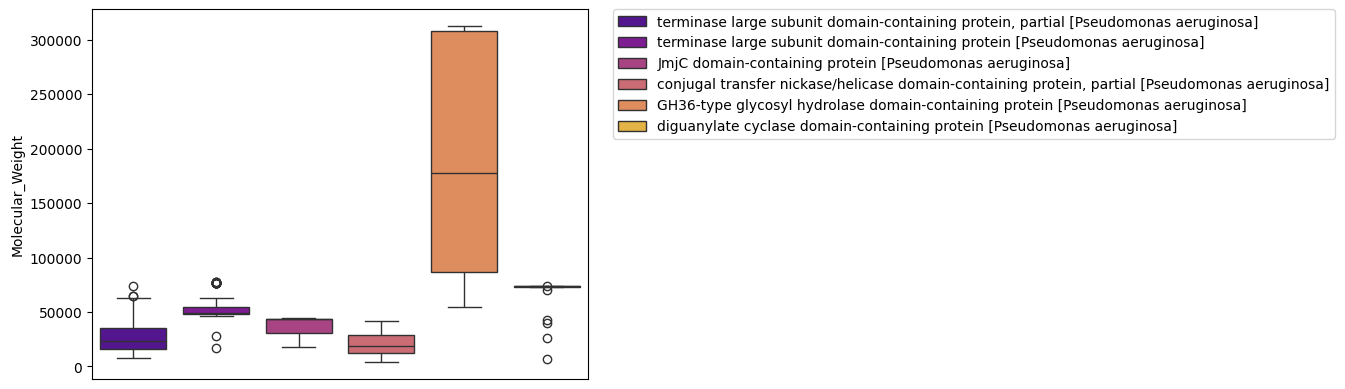

In [19]:
# Creating a Boxplot of protein names vs molecular weight

sns.boxplot(data=df_clean, x='Name', y='Molecular_Weight' ,   hue='Name', legend=True ,   palette='plasma')
plt.xlabel(None)
plt.xticks([])
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

<Axes: >

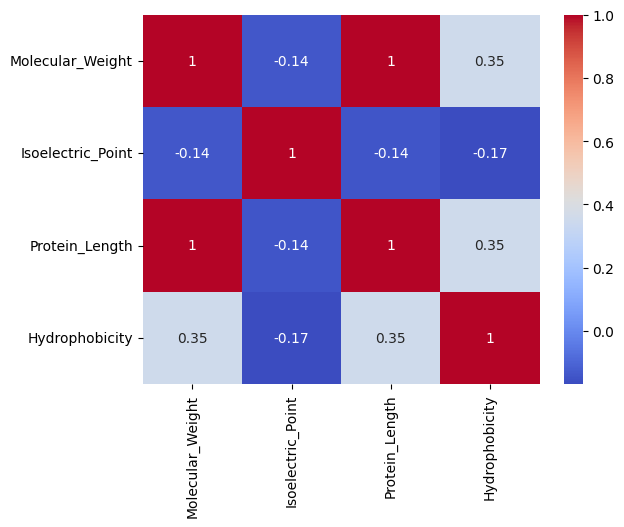

In [21]:
# Creating a heatmap containing only the features columns

sns.heatmap(df_clean.drop(['Name'],axis =1).corr(), annot=True, cmap='coolwarm')

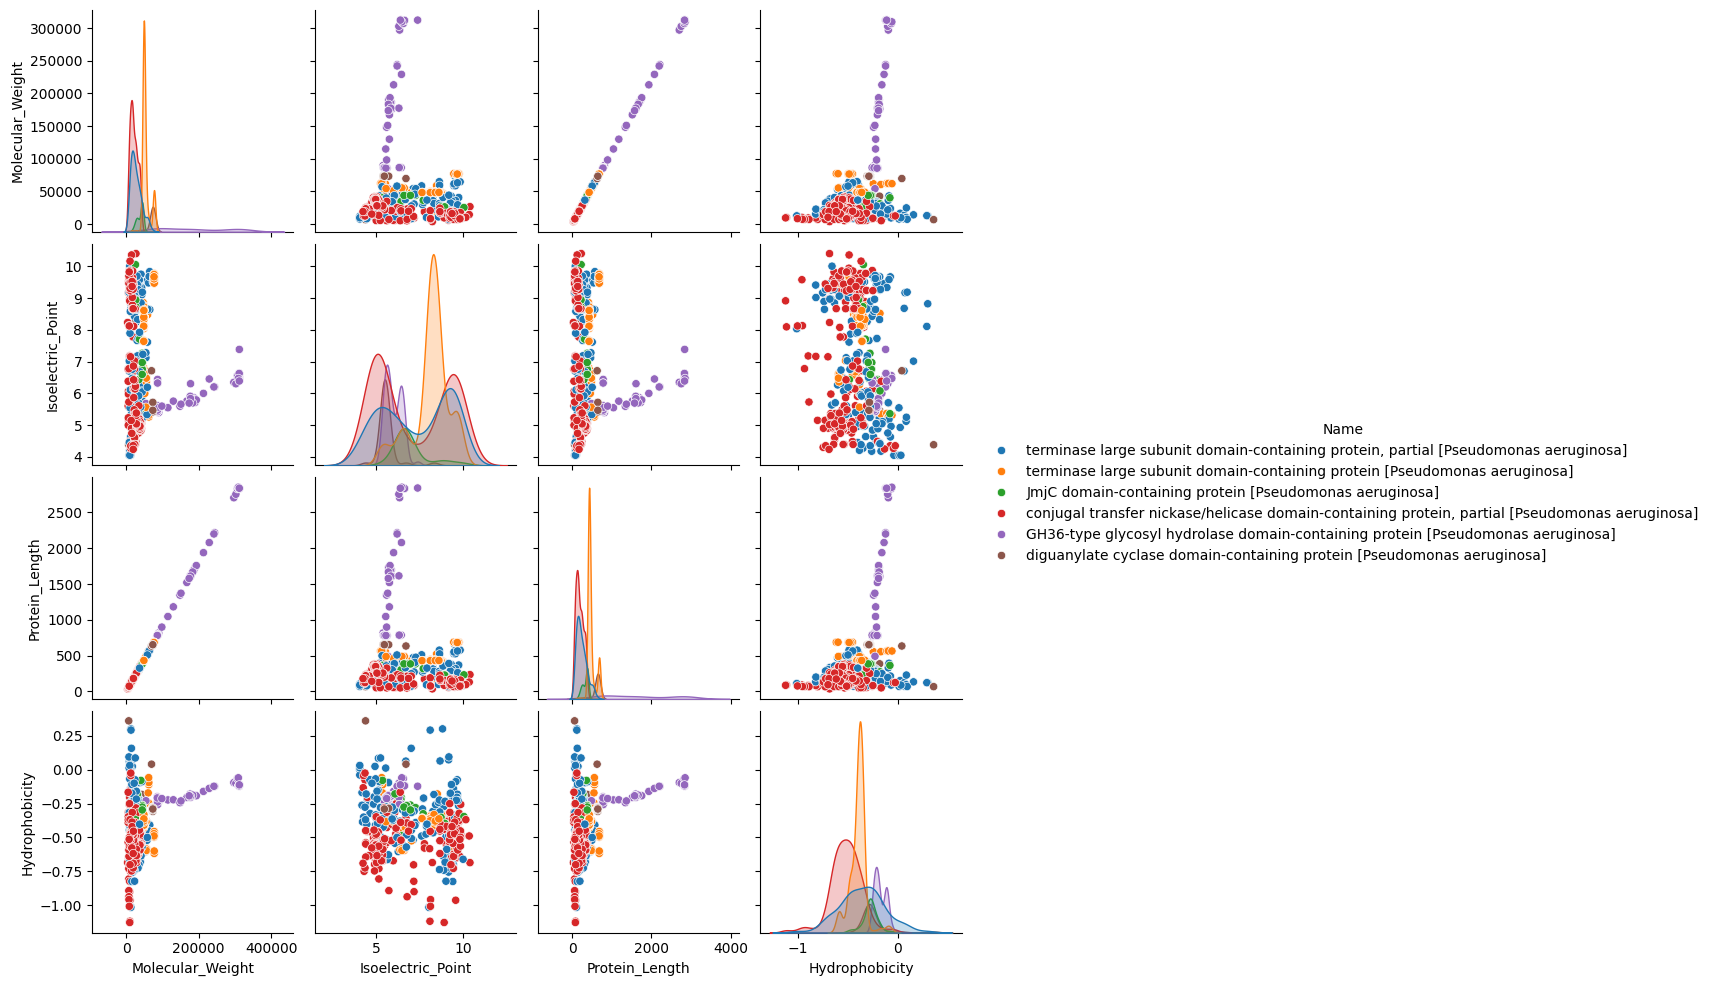

In [23]:
# Creating a Parplot

sns.pairplot(df_clean, hue='Name')

## Preprocessing


In [25]:
# Copying into new dataframe df_per so that previous visualisation is not affected

df_pre = df_clean.copy(deep=True)

In [27]:
# Label encoding Out target column 'Name'

encoder = LabelEncoder()

df_pre.iloc[:,0:1] = encoder.fit_transform(df_pre['Name'])
original_labels = encoder.classes_

In [28]:
# printing original protein classes as stored in Label encoder

print(original_labels)

['GH36-type glycosyl hydrolase domain-containing protein [Pseudomonas aeruginosa]'
 'JmjC domain-containing protein [Pseudomonas aeruginosa]'
 'conjugal transfer nickase/helicase domain-containing protein, partial [Pseudomonas aeruginosa]'
 'diguanylate cyclase domain-containing protein [Pseudomonas aeruginosa]'
 'terminase large subunit domain-containing protein [Pseudomonas aeruginosa]'
 'terminase large subunit domain-containing protein, partial [Pseudomonas aeruginosa]']


In [29]:
# Mapping original enzyme class to encoded class for understanding

label_to_enzyme_map = dict(zip(encoder.transform(original_labels),original_labels))
print("Label to Enzyme Class Mapping:")
print(label_to_enzyme_map)


Label to Enzyme Class Mapping:
{np.int64(0): 'GH36-type glycosyl hydrolase domain-containing protein [Pseudomonas aeruginosa]', np.int64(1): 'JmjC domain-containing protein [Pseudomonas aeruginosa]', np.int64(2): 'conjugal transfer nickase/helicase domain-containing protein, partial [Pseudomonas aeruginosa]', np.int64(3): 'diguanylate cyclase domain-containing protein [Pseudomonas aeruginosa]', np.int64(4): 'terminase large subunit domain-containing protein [Pseudomonas aeruginosa]', np.int64(5): 'terminase large subunit domain-containing protein, partial [Pseudomonas aeruginosa]'}


In [30]:
# making another copy into df_mod

df_mod = df_pre.copy(deep=True)

In [35]:
# Initializing our dependent and independent variables

X = df_mod.iloc[:,1:]
Y = df_mod.iloc[:,0:1]

In [38]:
# Printing X and Y variables

print('The independent variables are :-\n\n ', X)
print('The dependent variables are :-\n\n ', Y)

The independent variables are :-

       Molecular_Weight  Isoelectric_Point  Protein_Length  Hydrophobicity
105        33681.6776           9.363275             291       -0.712371
106         7948.8123           5.570756              69       -0.521739
107        34903.0957           5.249615             309       -0.287379
109        48147.0978           8.396185             428       -0.391589
110        41588.8357           8.256933             363       -0.308540
..                ...                ...             ...             ...
993        48558.7297           8.397023             431       -0.378886
995        48690.8489           8.607126             431       -0.362877
996        73390.3514           5.466286             651       -0.290476
998        19832.3657           6.857704             180       -0.453889
999        36832.3857           7.920666             324       -0.402160

[720 rows x 4 columns]
The dependent variables are :-

      Name
105    5
106    5
107

In [39]:
# Using ravel converts target variable Y into a one-dimensional NumPy array.(Required for Model Fitting)

Y = Y.values.ravel()
Y

array([5, 5, 5, 4, 5, 5, 5, 5, 5, 5, 5, 1, 4, 5, 4, 2, 2, 2, 5, 4, 4, 4,
       1, 4, 4, 4, 4, 5, 0, 4, 3, 3, 3, 3, 4, 3, 3, 3, 3, 2, 2, 2, 2, 2,
       4, 5, 5, 5, 2, 2, 5, 5, 4, 5, 5, 2, 5, 2, 5, 2, 5, 5, 3, 4, 2, 2,
       2, 2, 2, 2, 2, 2, 4, 4, 1, 4, 3, 4, 3, 3, 1, 3, 3, 5, 5, 3, 2, 2,
       3, 4, 5, 5, 3, 4, 3, 3, 3, 3, 4, 3, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3,
       3, 3, 5, 4, 4, 4, 4, 4, 4, 3, 5, 5, 5, 5, 4, 2, 3, 5, 3, 2, 5, 5,
       5, 1, 5, 2, 5, 5, 3, 4, 4, 0, 0, 2, 1, 4, 2, 4, 5, 4, 4, 5, 5, 5,
       4, 4, 2, 4, 4, 2, 2, 2, 4, 1, 5, 4, 1, 4, 4, 1, 4, 4, 5, 5, 5, 5,
       1, 4, 1, 4, 2, 0, 4, 5, 4, 1, 4, 5, 5, 4, 4, 2, 4, 4, 0, 4, 4, 5,
       4, 4, 5, 4, 4, 5, 2, 2, 4, 4, 4, 4, 4, 4, 1, 2, 1, 1, 5, 4, 5, 5,
       5, 5, 5, 5, 2, 2, 2, 4, 1, 5, 5, 5, 4, 4, 2, 4, 4, 2, 5, 4, 1, 4,
       1, 4, 2, 0, 4, 5, 0, 5, 2, 5, 5, 5, 2, 4, 1, 2, 5, 2, 5, 5, 5, 4,
       4, 4, 5, 5, 4, 4, 2, 0, 4, 4, 2, 4, 4, 4, 5, 5, 5, 5, 5, 4, 5, 4,
       5, 5, 4, 4, 4, 2, 4, 2, 2, 4, 2, 5, 5, 4, 4,

In [40]:
# Convert our flattened list into a numpy dataframe(Required for Model Fitting)

Y = pd.DataFrame(Y)
Y.rename({0: 'Name'}, axis=1, inplace=True)
Y

,Name
0,5
1,5
2,5
3,4
4,5
...,...
715,4
716,4
717,3
718,2


In [41]:
# Changing column to numerical to facilitate fitting of our model

X['Protein_Length'] = X['Protein_Length'].astype(float)
Y['Name'] = Y['Name'].astype(int)

In [45]:
# Breaking our dependent and independent variables into training and testing in 80:20 ratio

X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42)

In [44]:
# printing all the dimensions of new train and test variables

print(Y_test.shape)
print(X_test.shape)
print(Y_train.shape)
print(X_train.shape)

(144, 1)
(144, 4)
(576, 1)
(576, 4)


#Fitting


In [46]:
# Fitting our data to a One-vs-All(OVR) wrapped random forest model (with base parameters)

forest_model = RandomForestClassifier(random_state=72,class_weight = "balanced",n_estimators=150)
OvR = OneVsRestClassifier(forest_model)
OvR.fit(X_train, Y_train)

OneVsRestClassifier(estimator=RandomForestClassifier(class_weight='balanced',
                                                     n_estimators=150,
                                                     random_state=72))

##Accuracy and other metrics

In [49]:
# predicting with respect to test data and train data

y_pred = OvR.predict(X_test)
y_check = OvR.predict(X_train)

In [50]:
# printing predicted scores for test and train data

print("Training set score for rf: %f" % OvR.score(X_train , Y_train))
print("Testing  set score for rf: %f" % OvR.score(X_test  , Y_test ))

OvR.score(X_test  , Y_test )

Training set score for rf: 1.000000
Testing  set score for rf: 0.916667


0.9166666666666666

In [52]:
# Using Inverse Tranformation to get back our original protein names since model prediction is completed

Y_pred_label = list(encoder.inverse_transform(y_pred))
print(Y_pred_label)

Y_test_label = list(encoder.inverse_transform(Y_test))
print(Y_test_label)

['terminase large subunit domain-containing protein [Pseudomonas aeruginosa]', 'terminase large subunit domain-containing protein [Pseudomonas aeruginosa]', 'terminase large subunit domain-containing protein, partial [Pseudomonas aeruginosa]', 'terminase large subunit domain-containing protein [Pseudomonas aeruginosa]', 'terminase large subunit domain-containing protein [Pseudomonas aeruginosa]', 'conjugal transfer nickase/helicase domain-containing protein, partial [Pseudomonas aeruginosa]', 'terminase large subunit domain-containing protein [Pseudomonas aeruginosa]', 'terminase large subunit domain-containing protein [Pseudomonas aeruginosa]', 'terminase large subunit domain-containing protein [Pseudomonas aeruginosa]', 'conjugal transfer nickase/helicase domain-containing protein, partial [Pseudomonas aeruginosa]', 'conjugal transfer nickase/helicase domain-containing protein, partial [Pseudomonas aeruginosa]', 'conjugal transfer nickase/helicase domain-containing protein, partial [

/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [53]:
# printing a classification report with original protein classes

print(classification_report(Y_test_label,Y_pred_label))

                                                                                                precision    recall  f1-score   support

               GH36-type glycosyl hydrolase domain-containing protein [Pseudomonas aeruginosa]       1.00      1.00      1.00        14
                                       JmjC domain-containing protein [Pseudomonas aeruginosa]       0.75      1.00      0.86         3
conjugal transfer nickase/helicase domain-containing protein, partial [Pseudomonas aeruginosa]       0.92      0.90      0.91        49
                        diguanylate cyclase domain-containing protein [Pseudomonas aeruginosa]       1.00      0.75      0.86         8
                    terminase large subunit domain-containing protein [Pseudomonas aeruginosa]       0.97      1.00      0.99        36
           terminase large subunit domain-containing protein, partial [Pseudomonas aeruginosa]       0.83      0.85      0.84        34

                                              

In [64]:
# Creating a confusionn matrix and then converting to dataframe and visualising it

cm = confusion_matrix(Y_test_label,Y_pred_label)
cm_df = pd.DataFrame(cm, index= original_labels, columns= original_labels)
print("\nConfusion Matrix (Pandas DataFrame):\n")
cm_df


Confusion Matrix (Pandas DataFrame):



,GH36-type glycosyl hydrolase domain-containing protein [Pseudomonas aeruginosa],JmjC domain-containing protein [Pseudomonas aeruginosa],"conjugal transfer nickase/helicase domain-containing protein, partial [Pseudomonas aeruginosa]",diguanylate cyclase domain-containing protein [Pseudomonas aeruginosa],terminase large subunit domain-containing protein [Pseudomonas aeruginosa],"terminase large subunit domain-containing protein, partial [Pseudomonas aeruginosa]"
GH36-type glycosyl hydrolase domain-containing protein [Pseudomonas aeruginosa],14,0,0,0,0,0
JmjC domain-containing protein [Pseudomonas aeruginosa],0,3,0,0,0,0
"conjugal transfer nickase/helicase domain-containing protein, partial [Pseudomonas aeruginosa]",0,0,44,0,0,5
diguanylate cyclase domain-containing protein [Pseudomonas aeruginosa],0,1,0,6,0,1
terminase large subunit domain-containing protein [Pseudomonas aeruginosa],0,0,0,0,36,0
"terminase large subunit domain-containing protein, partial [Pseudomonas aeruginosa]",0,0,4,0,1,29


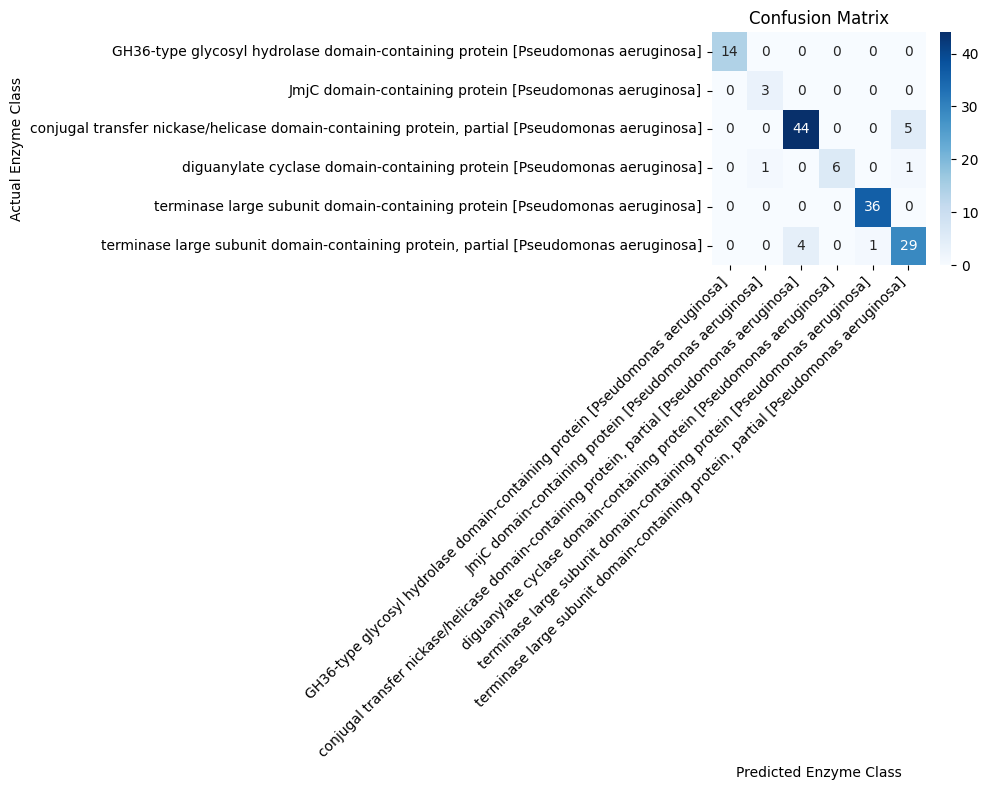

In [67]:
# Creating a seaborn heatmap of our confusion matrix dataFrame for better visualization

plt.figure(figsize=(10, 8))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual Enzyme Class')
plt.xlabel('Predicted Enzyme Class')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [70]:
'''
From each of the binary classifiers of our Ovr module extract feature importance from each trained estimator
Store current estimator scores in a dictionary and print it
Finally calculate the average feature importance across all the binary estimators in the OvR model.
'''

all_feature_scores = {}
for i in range(len(OvR.estimators_)):
    feature_scores = pd.Series(OvR.estimators_[i].feature_importances_, index=X_train.columns).sort_values(ascending=False)
    all_feature_scores[f'Estimator_{i+1}'] = feature_scores

# Print the feature scores for each estimator
for estimator, scores in all_feature_scores.items():
    print(f"\nFeature Scores for {estimator}:")
    print(scores)

final_feature_scores = pd.DataFrame(all_feature_scores).mean(axis=1).sort_values(ascending=False)
print("\nFinal Feature Scores (Average):")
print(final_feature_scores)


Feature Scores for Estimator_1:
Protein_Length       0.437639
Molecular_Weight     0.426784
Hydrophobicity       0.131345
Isoelectric_Point    0.004231
dtype: float64

Feature Scores for Estimator_2:
Hydrophobicity       0.336479
Protein_Length       0.265422
Molecular_Weight     0.252688
Isoelectric_Point    0.145411
dtype: float64

Feature Scores for Estimator_3:
Molecular_Weight     0.390763
Protein_Length       0.245989
Hydrophobicity       0.239891
Isoelectric_Point    0.123357
dtype: float64

Feature Scores for Estimator_4:
Molecular_Weight     0.368922
Protein_Length       0.366631
Hydrophobicity       0.201744
Isoelectric_Point    0.062703
dtype: float64

Feature Scores for Estimator_5:
Protein_Length       0.379482
Molecular_Weight     0.369137
Hydrophobicity       0.155004
Isoelectric_Point    0.096377
dtype: float64

Feature Scores for Estimator_6:
Molecular_Weight     0.276184
Hydrophobicity       0.264946
Protein_Length       0.250663
Isoelectric_Point    0.208206
dtype: 

<ipython-input-69-9844631f8f1a>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=final_feature_scores , y=final_feature_scores .index ,  palette='viridis')


Text(0.5, 1.0, 'Visualizing Important Features')

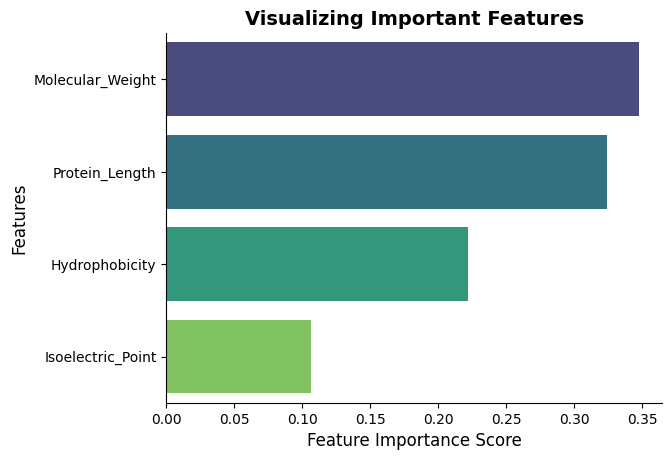

In [69]:
# Creating a seaborn bar plot for visualising feature importance

sns.barplot(x=final_feature_scores , y=final_feature_scores.index ,  palette='viridis')



# Add labels to the graph

plt.xlabel('Feature Importance Score' , fontsize=12)

plt.ylabel('Features', fontsize=12)

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

sns.despine()



# Add title to the graph

plt.title("Visualizing Important Features", fontsize=14, fontweight='bold')



# Visualize the graph

#plt.show()

##Functional Annotation



In [88]:
# Manually mapped enzyme class to Go id's

enzyme_to_go_ids = {
    'GH36-type glycosyl hydrolase domain-containing protein [Pseudomonas aeruginosa]' : ['GO:0030246', 'GO:0005975', 'GO:0004339', 'GO:0016757'] ,
    'JmjC domain-containing protein [Pseudomonas aeruginosa]' : ['GO:0016706'],
    'conjugal transfer nickase/helicase domain-containing protein, partial [Pseudomonas aeruginosa]' : ['GO:0005524', 'GO:0003677' , 'GO:0003678'],
    'diguanylate cyclase domain-containing protein [Pseudomonas aeruginosa]' : ['GO:0052621', 'GO:0005525', 'GO:0046872', 'GO:0007165'],
    'terminase large subunit domain-containing protein [Pseudomonas aeruginosa]' : ['GO:0005524', 'GO:0140657', 'GO:0004519'],
    'terminase large subunit domain-containing protein, partial [Pseudomonas aeruginosa]' : ['GO:0005524' , 'GO:0005524']
}

In [106]:
# Download the 'go-basic.obo' file from the Gene Ontology website.
obo_fname = download_go_basic_obo()
# Parse the downloaded 'go-basic.obo' file and create a GODag object.
obodag = GODag("go-basic.obo")

  EXISTS: go-basic.obo
go-basic.obo: fmt(1.2) rel(2025-03-16) 43,544 Terms


In [103]:
# Get a dictionary of enzyme names, go ids, names and namespace by running manually curated go ids to database go Ids

go_data = []
def get_go_term_info(go_id):
    if go_id in obodag:
        term = obodag[go_id]

        go_data.append({'Enzyme name ' : enzyme_name,
                      'GO ID' : term.id,
                      'Function': term.name,
                     'Namespace' : term.namespace
                      })


    else:
        print(f"GO ID '{go_id}' not found in the ontology.")


for enzyme_name in enzyme_to_go_ids.keys() :
  go_ids = enzyme_to_go_ids.get(enzyme_name, [])


  for go_id in go_ids:
      get_go_term_info(go_id)

In [104]:
#Converting dictionary to pandas dataframe
df_go_data = pd.DataFrame(go_data)

In [105]:
#Visualising the dataframe
df_go_data

,Enzyme name,GO ID,Function,Namespace
0,GH36-type glycosyl hydrolase domain-containing...,GO:0030246,carbohydrate binding,molecular_function
1,GH36-type glycosyl hydrolase domain-containing...,GO:0005975,carbohydrate metabolic process,biological_process
2,GH36-type glycosyl hydrolase domain-containing...,GO:0004339,"glucan 1,4-alpha-glucosidase activity",molecular_function
3,GH36-type glycosyl hydrolase domain-containing...,GO:0016757,glycosyltransferase activity,molecular_function
4,JmjC domain-containing protein [Pseudomonas ae...,GO:0016706,2-oxoglutarate-dependent dioxygenase activity,molecular_function
5,conjugal transfer nickase/helicase domain-cont...,GO:0005524,ATP binding,molecular_function
6,conjugal transfer nickase/helicase domain-cont...,GO:0003677,DNA binding,molecular_function
7,conjugal transfer nickase/helicase domain-cont...,GO:0003678,DNA helicase activity,molecular_function
8,diguanylate cyclase domain-containing protein ...,GO:0052621,diguanylate cyclase activity,molecular_function
9,diguanylate cyclase domain-containing protein ...,GO:0005525,GTP binding,molecular_function
